<a href="https://colab.research.google.com/github/alibh97/Telecom_Churn/blob/master/Ali_Behrouzi_DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Project**
**Ali Behrouzi**

**4010724002**



# **Customer Churn Prediction**
**Dataset : Telecom customer**

Unzip the datat from the Archive in drive

In [ ]:
!unzip drive/MyDrive/telecom.zip

Archive:  drive/MyDrive/telecom.zip
  inflating: Telecom_customer churn.csv  


**Load the dataset**

In [ ]:
import pandas as pd
import os

# Load the dataset
dataset_path = os.path.join("Telecom_customer churn.csv")
telecom_df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
telecom_df.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


# **examining the distribution of the 'churn' column**

In [ ]:
# Check the distribution of the 'churn' column
churn_distribution = telecom_df['churn'].value_counts(normalize=True)

# Check for missing values in the dataset
missing_values = telecom_df.isnull().sum()

# Filter out columns with missing values for display
missing_values = missing_values[missing_values > 0]

churn_distribution, missing_values


(0    0.50438
 1    0.49562
 Name: churn, dtype: float64,
 rev_Mean              357
 mou_Mean              357
 totmrc_Mean           357
 da_Mean               357
 ovrmou_Mean           357
 ovrrev_Mean           357
 vceovr_Mean           357
 datovr_Mean           357
 roam_Mean             357
 change_mou            891
 change_rev            891
 avg6mou              2839
 avg6qty              2839
 avg6rev              2839
 prizm_social_one     7388
 area                   40
 dualband                1
 refurb_new              1
 hnd_price             847
 phones                  1
 models                  1
 hnd_webcap          10189
 truck                1732
 rv                   1732
 ownrent             33706
 lor                 30190
 dwlltype            31909
 marital              1732
 adults              23019
 infobase            22079
 income              25436
 numbcars            49366
 HHstatin            37923
 dwllsize            38308
 forgntvl             17


Here's what we've found:

1. **Churn Distribution**:
   - Approximately 50.4% of the users have not churned (labeled as 0).
   - Approximately 49.6% of the users have churned (labeled as 1).

   The classes are fairly balanced, which is good for modeling.

2. **Missing Values**:
   - Several columns have missing values. Some columns, like `ownrent`, `lor`, and `dwlltype`, have a large number of missing values.
   - Handling these missing values will be crucial before modeling. We can either impute them with appropriate values or consider dropping some of the columns with a very high percentage of missing values.


# **Exploratory Data Analysis (EDA)**

# Univariate Analysis

**distribution** **of a subset of numerical variables**




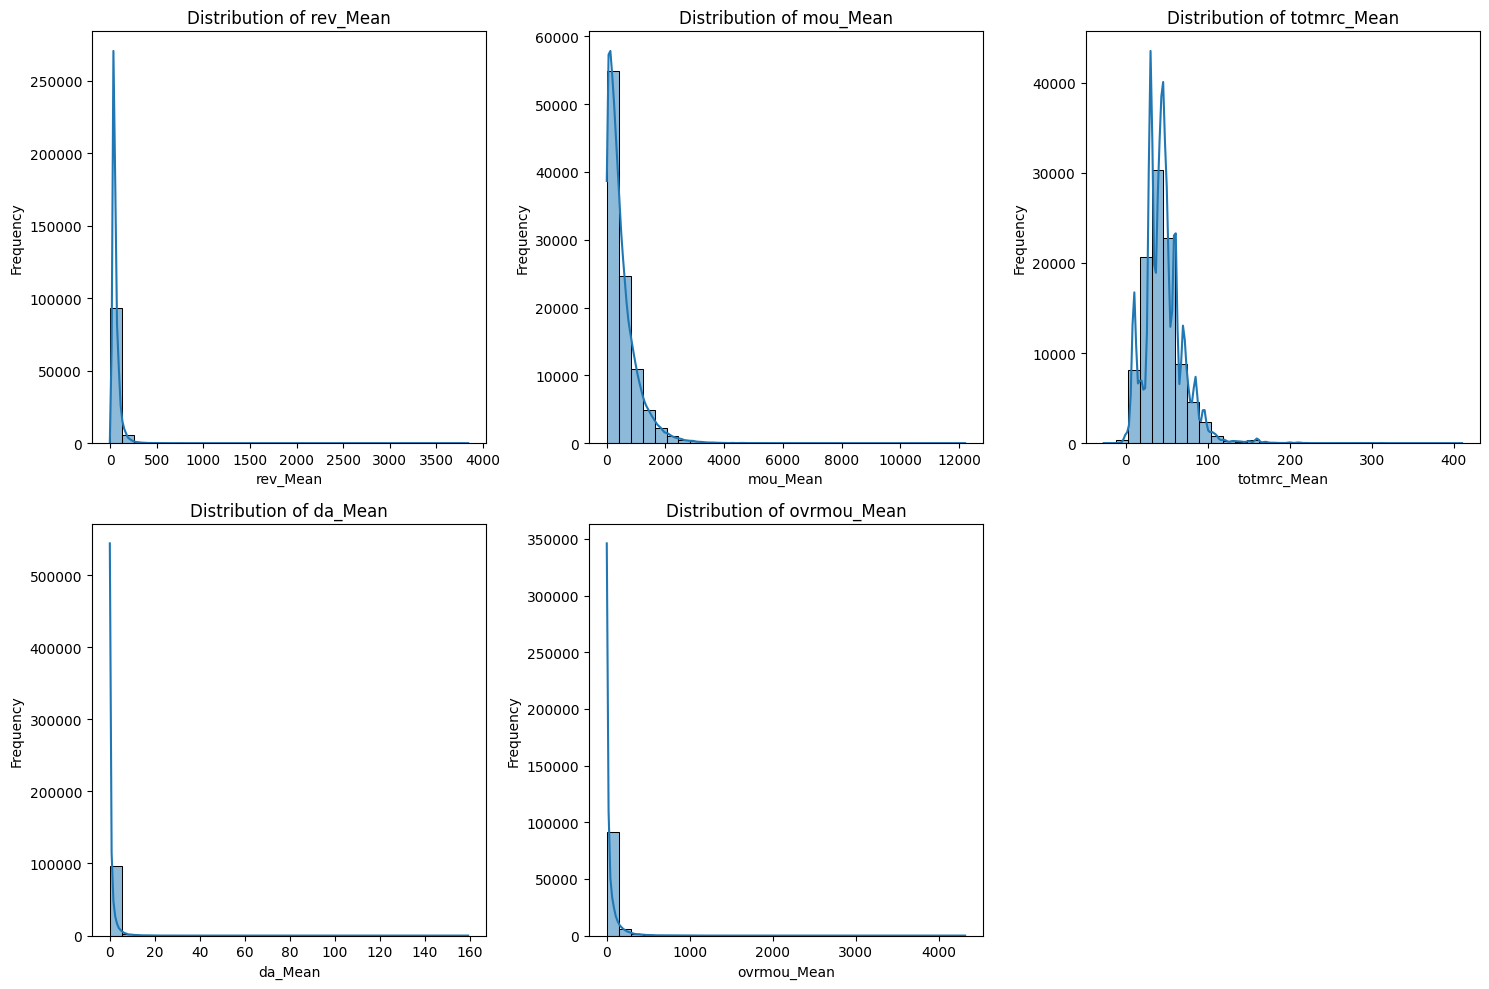

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of numerical columns for demonstration
numerical_cols = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean']

# Plotting histograms for the selected numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(telecom_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Here are the distributions for a subset of the numerical variables:

- **rev_Mean**: This seems to be right-skewed with most values clustered towards the lower end.
- **mou_Mean**: This represents the mean number of minutes of use. Similar to `rev_Mean`, it's also right-skewed.
- **totmrc_Mean**: Right-skewed distribution with a cluster around the lower values.
- **da_Mean**: Most values are concentrated around 0, indicating that many users have no or very low "direct access" usage.
- **ovrmou_Mean**: This variable, representing overage minutes, also has most values clustered near 0, suggesting that many users do not exceed their allocated minutes.


-------------------------------------------------------------------------------------------------


**visualize the distribution of a few categorical variables**

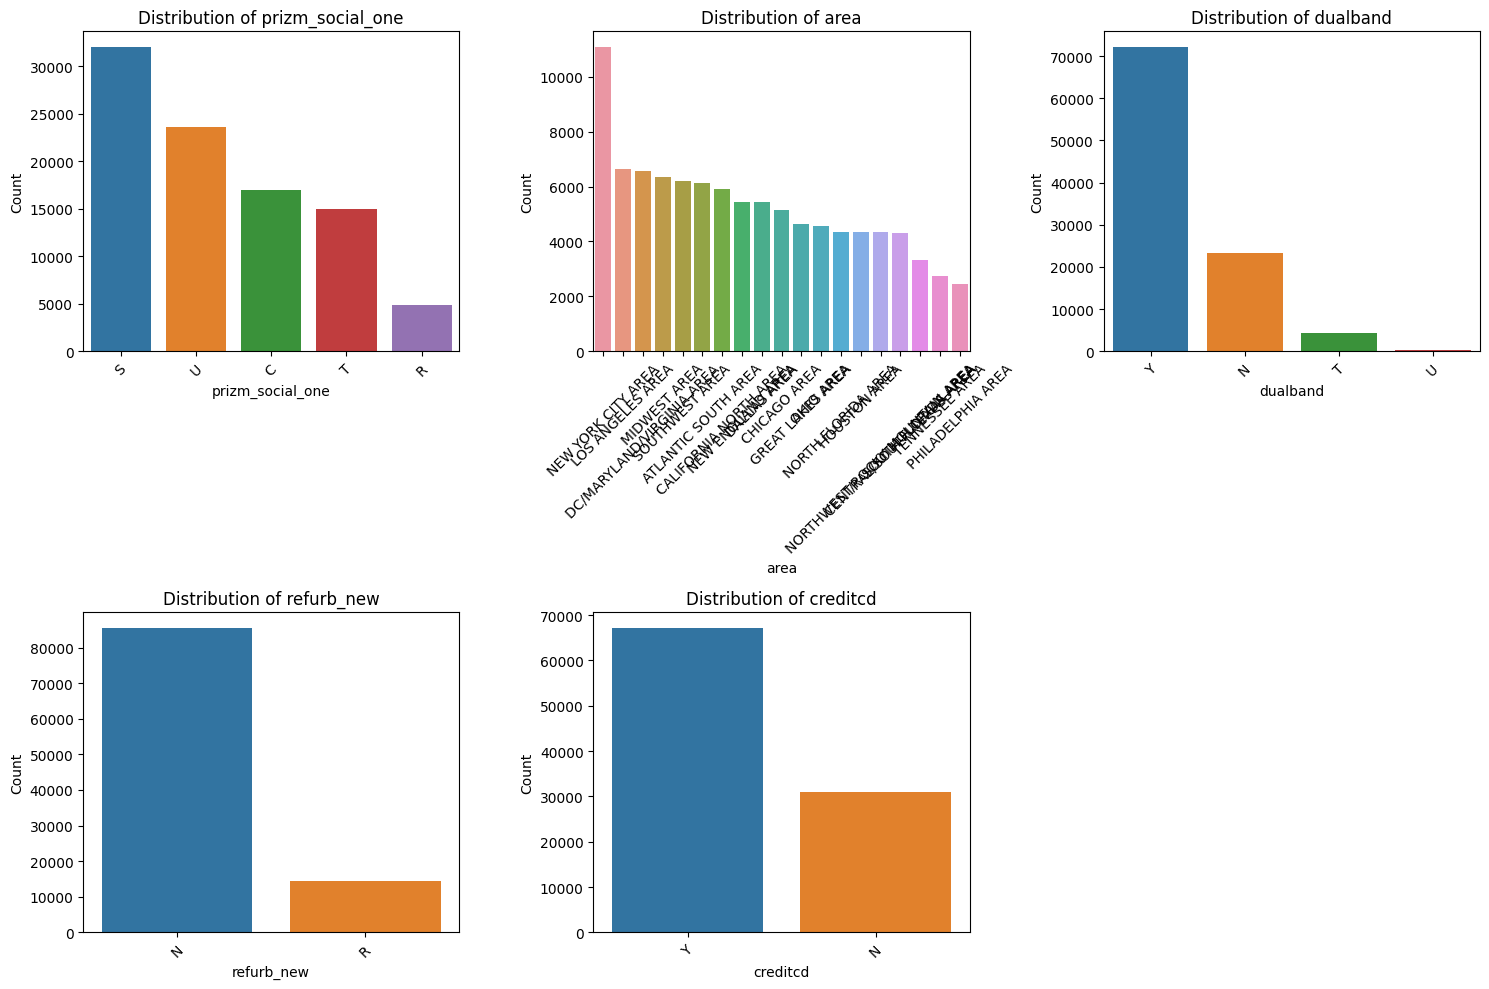

In [ ]:
# Selecting a subset of categorical columns for demonstration
categorical_cols = ['prizm_social_one', 'area', 'dualband', 'refurb_new', 'creditcd']

# Plotting count plots for the selected categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=telecom_df, x=col, order=telecom_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




Here are the distributions for a subset of the categorical variables:

- **prizm_social_one**: This variable has several categories, with 'S' and 'U' being the most frequent.
- **area**: The dataset contains data from multiple areas, with some areas having more observations than others.
- **dualband**: Most users have the 'Y' category, indicating they might be using dual-band devices.
- **refurb_new**: A vast majority of users have 'N', suggesting they might be using new devices rather than refurbished ones.
- **creditcd**: Most users seem to have the 'Y' category, possibly indicating they have a credit card.



# Bivariate Analysis



1. **Correlation Matrix**:
    - We'll visualize the correlation of numerical features with the target variable 'churn'.


<ipython-input-6-bfb031c09acd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = telecom_df.corr()['churn'].sort_values(ascending=False)


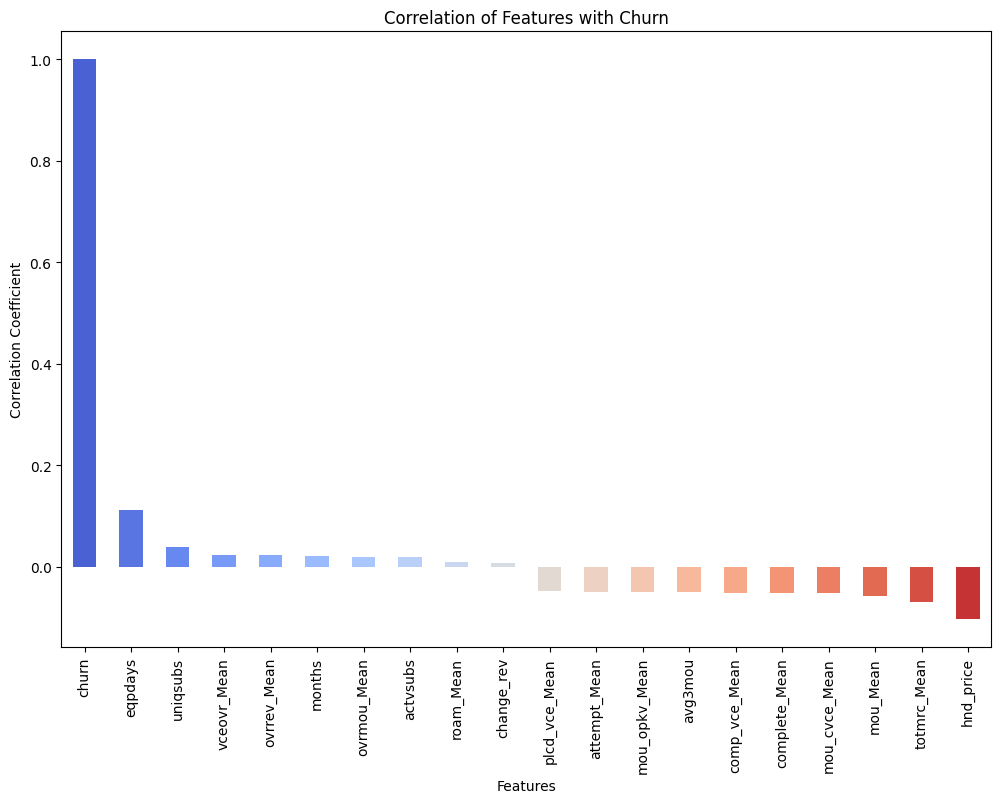

In [ ]:
# Calculate the correlation of all numerical columns with 'churn'
correlation_with_churn = telecom_df.corr()['churn'].sort_values(ascending=False)

# Select top and bottom correlated features for visualization
top_correlated = correlation_with_churn.head(10)
bottom_correlated = correlation_with_churn.tail(10)
selected_correlation = pd.concat([top_correlated, bottom_correlated])

# Plotting
plt.figure(figsize=(12, 8))
selected_correlation.plot(kind='bar', color=sns.color_palette('coolwarm', len(selected_correlation)))
plt.title('Correlation of Features with Churn')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()




- **Positive Correlation**: Features that have a positive correlation indicate that as the feature value increases, the likelihood of churn also increases.
- **Negative Correlation**: Features that have a negative correlation indicate that as the feature value increases, the likelihood of churn decreases.

From the visualization:
- Features like `eqpdays` (equipment days) have a strong positive correlation with churn, suggesting that users with older equipment might be more likely to churn.
- On the other hand, features like `mou_Mean` (mean minutes of usage) and `rev_Mean` (mean revenue) show a negative correlation, indicating that users with higher usage or revenue are less likely to churn.




2. **Box Plots**:
    - We'll choose a few numerical features and visualize their distribution with respect to the 'churn' column.


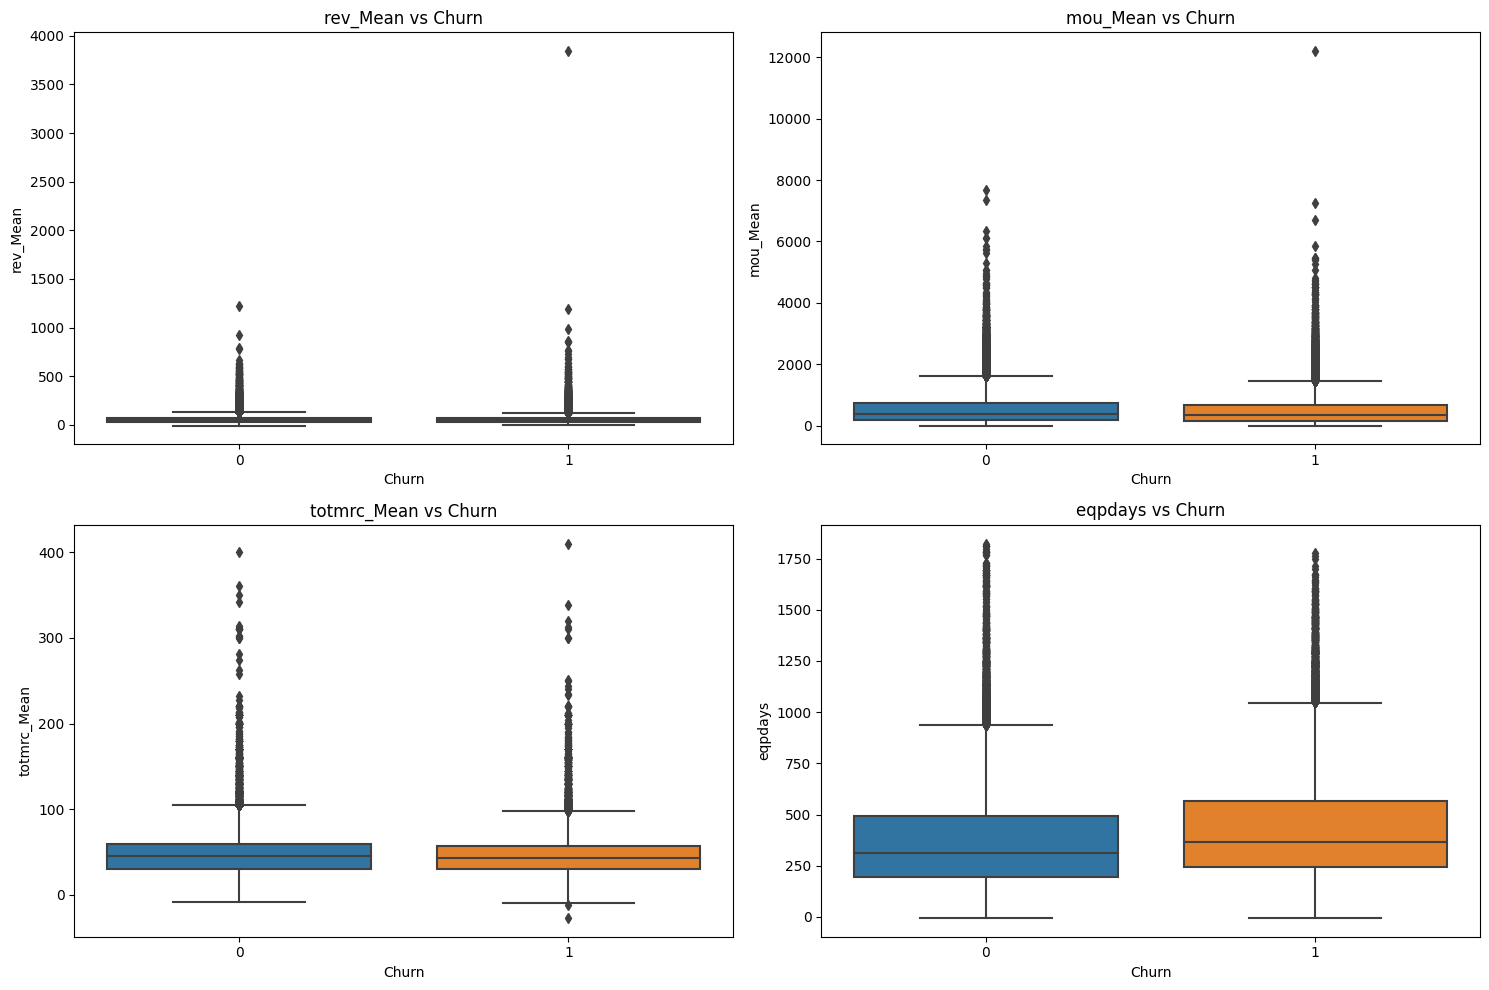

In [ ]:
# Selecting a subset of numerical columns for demonstration
selected_numerical_cols = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'eqpdays']

# Plotting box plots for the selected numerical columns against 'churn'
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=telecom_df, x='churn', y=col)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()




- **rev_Mean**: The median revenue for non-churn users is slightly higher than for churn users. There are also several outliers present, especially for churn users.
  
- **mou_Mean**: Non-churn users tend to have a higher median of minutes of use compared to churn users. Again, there are outliers indicating users with very high usage.

- **totmrc_Mean**: Non-churn users have a slightly higher median of total monthly recurring charge than churn users.
  
- **eqpdays**: The median equipment age is higher for churn users, which aligns with the positive correlation we observed earlier. Users with older equipment are more likely to churn.


------------------------------------------------------------------------------------


3. **Categorical vs 'churn'**:
    - We'll select a few categorical features and visualize how different categories might be affecting the churn rate using stacked bar plots or count plots.



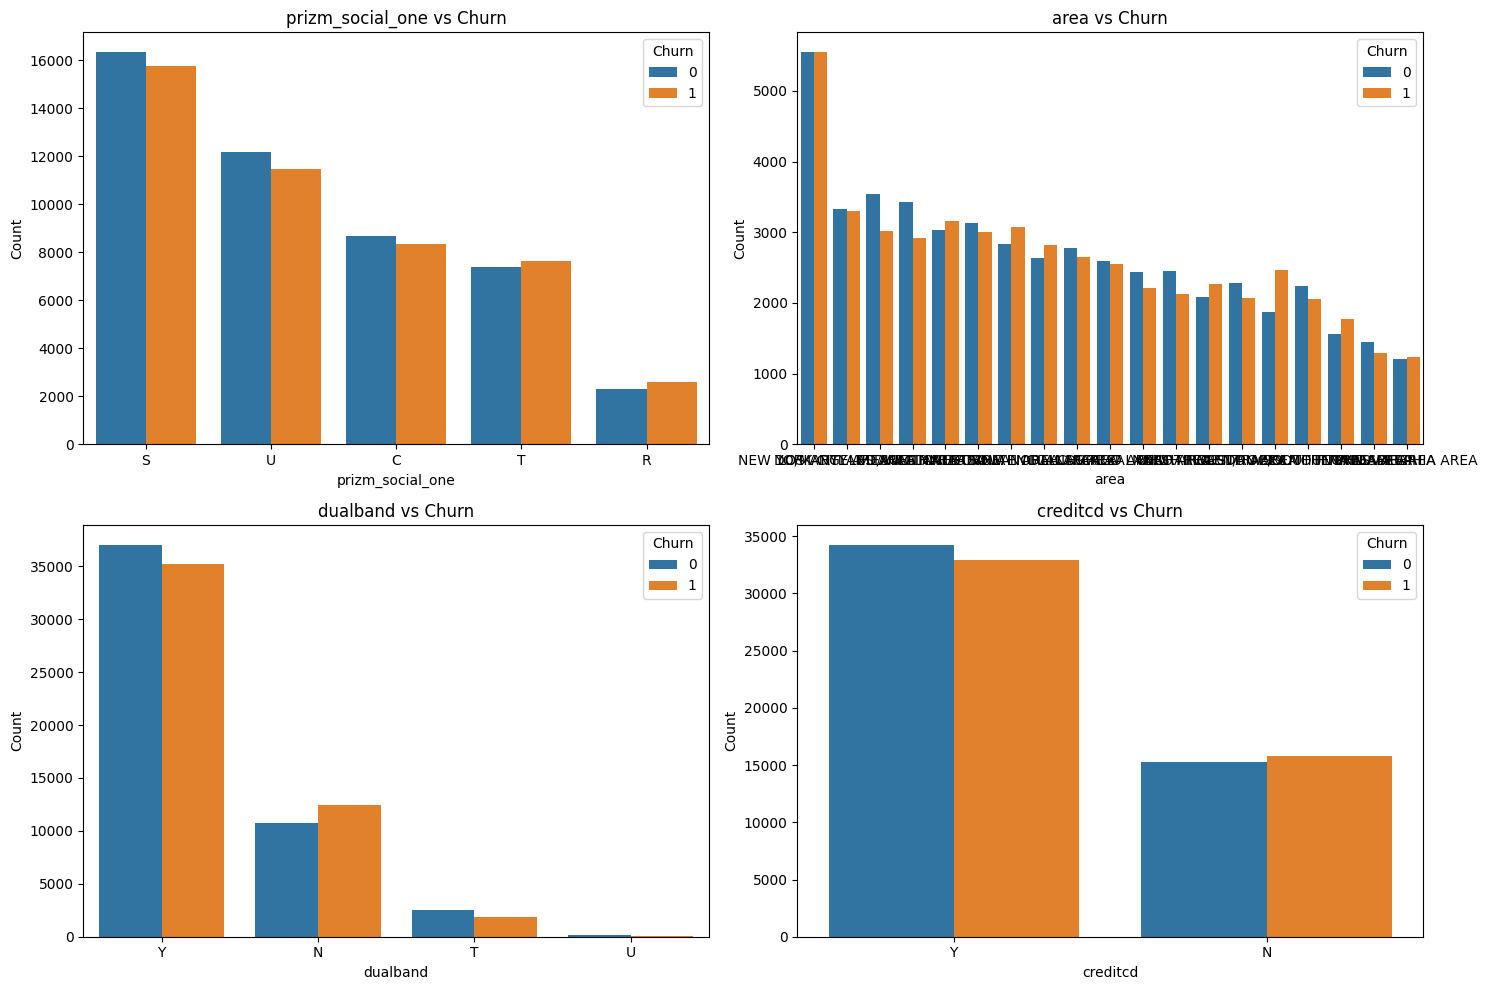

In [ ]:
# Selecting a subset of categorical columns for demonstration
selected_categorical_cols = ['prizm_social_one', 'area', 'dualband', 'creditcd']

# Plotting count plots for the selected categorical columns against 'churn'
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=telecom_df, x=col, hue='churn', order=telecom_df[col].value_counts().index)
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()




- **prizm_social_one**: Different categories within this feature show varying churn rates. For instance, category 'S' seems to have a higher churn rate compared to others.
  
- **area**: The churn rate varies across different areas, with some areas showing a higher proportion of churned users than others.
  
- **dualband**: The churn rate is slightly higher for users in the 'Y' category compared to the 'N' category.
  
- **creditcd**: Users in the 'Y' category (possibly indicating they have a credit card) seem to have a slightly lower churn rate compared to the 'N' category.


# Multivariate Analysis



1. **Pair Plots**:
   - Create scatter plots for a few selected features to visualize the relationships between them and see if any clusters or patterns emerge.
   

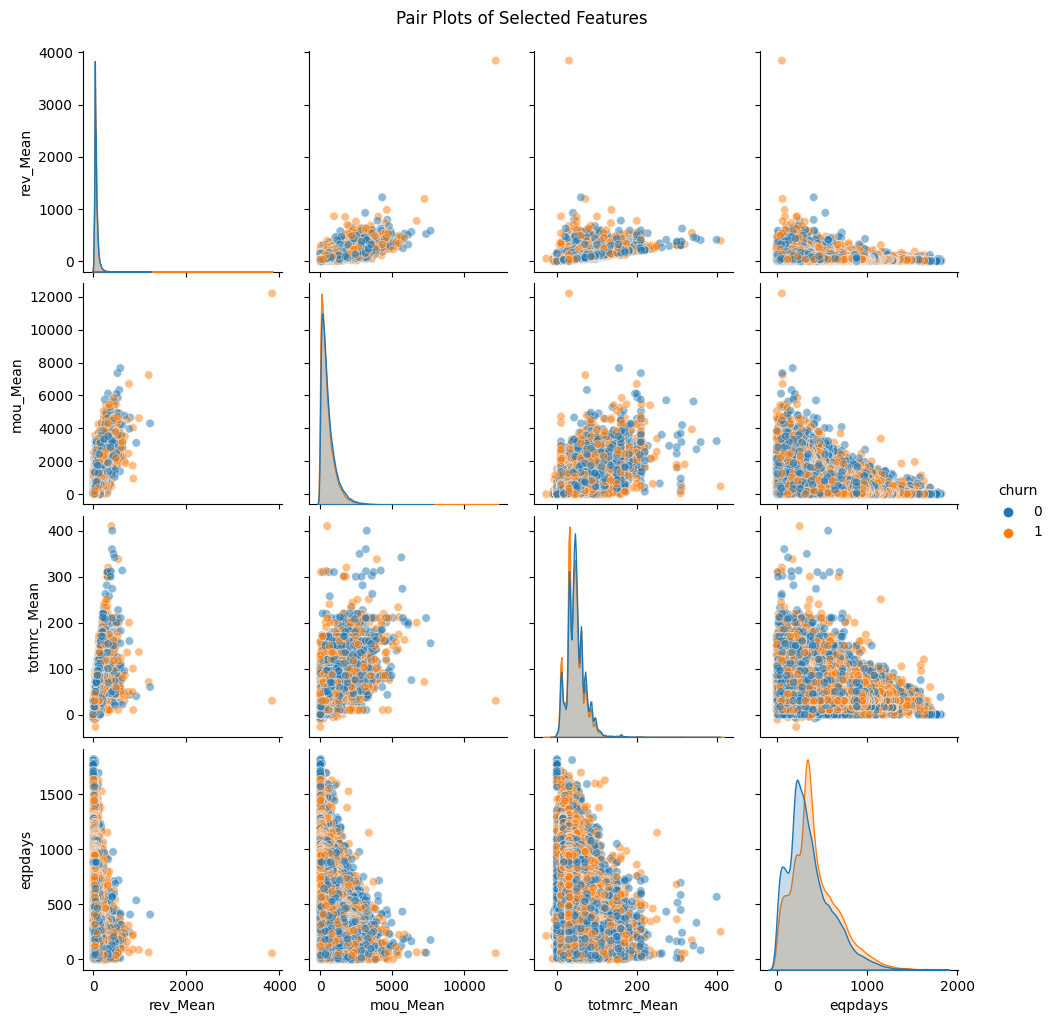

In [ ]:
# Selecting a smaller subset of numerical columns for the pair plot (for visualization clarity)
selected_for_pairplot = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'eqpdays', 'churn']

# Creating a pair plot for the selected columns
sns.pairplot(telecom_df[selected_for_pairplot], hue='churn', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plots of Selected Features', y=1.02)
plt.show()


The pair plots showcase the relationships between selected numerical features and how they are distributed based on the churn status:

- The diagonal plots represent the distribution of individual features, separated by churn status.
- The off-diagonal scatter plots show the relationships between two features, colored by churn status.

From these plots, you can observe:
- Patterns of concentration where churned and non-churned users seem to cluster.
- Relationships or trends between some features.

------------------------------------------------------------------------------------

2. **Heatmaps**:
   - This can be especially useful if we want to observe the behavior of groups of features against the `churn` rate or to view the correlation between multiple features.

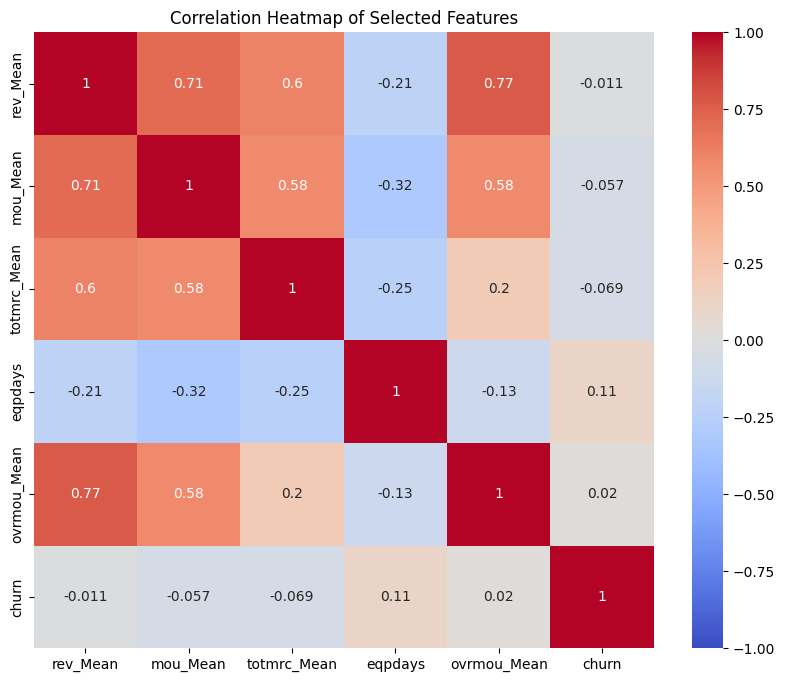

In [ ]:
# Selecting a subset of numerical columns for the heatmap
heatmap_cols = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'eqpdays', 'ovrmou_Mean', 'churn']

# Calculating the correlation matrix for the selected columns
correlation_matrix = telecom_df[heatmap_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


The heatmap displays the correlation between the selected numerical features:

- The color intensity and the annotated values represent the strength and direction of the correlation.
- Values close to 1 or -1 represent strong positive or negative correlations, respectively, while values close to 0 represent weak or no correlation.

From the heatmap:
- `rev_Mean`, `mou_Mean`, and `totmrc_Mean` have strong positive correlations with each other, which makes intuitive sense as they are all related to the user's usage and revenue.
- `eqpdays` has a positive correlation with `churn`, reaffirming our earlier observation that users with older equipment are more likely to churn.


------------------------------------------------------------------------------------

# Outlier Detection

1. **Visual Methods**

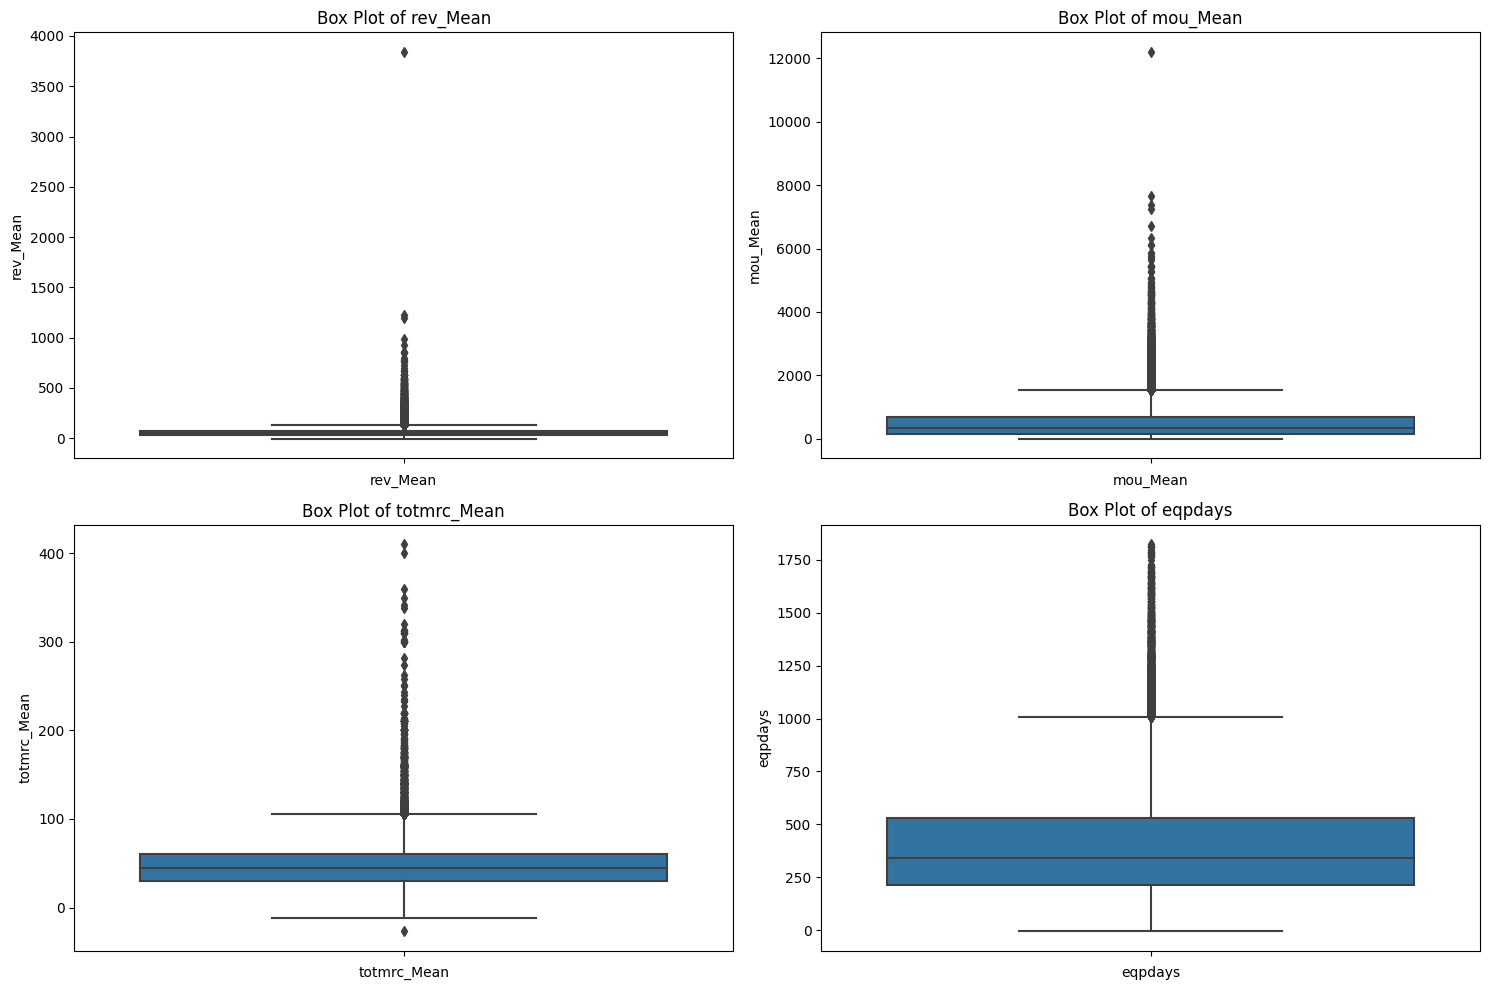

In [ ]:
# Selecting a subset of numerical columns for box plots
selected_for_outliers = ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'eqpdays']

# Plotting box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_for_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=telecom_df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


- **rev_Mean**: There are several data points above the upper whisker, indicating potential outliers.
  
- **mou_Mean**: Like `rev_Mean`, there are data points above the upper whisker which can be considered as outliers.
  
- **totmrc_Mean**: Similarly, potential outliers can be observed above the upper whisker.
  
- **eqpdays**: Most data points are clustered below, but there are a few above the upper whisker, suggesting potential outliers.

-------------------------------------------------------------------------------------------------


2. **Statistical Method**:
   - **IQR (Interquartile Range)**: Data points outside \(1.5 \times \text{IQR}\) from the Q1 and Q3 quartiles can be considered outliers.


In [ ]:
# Function to calculate the lower and upper bounds for outliers based on IQR
def calculate_iqr_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outliers for the selected columns
outliers_data = {}
for col in selected_for_outliers:
    lower_bound, upper_bound = calculate_iqr_bounds(telecom_df[col])
    outliers = telecom_df[(telecom_df[col] < lower_bound) | (telecom_df[col] > upper_bound)]
    outliers_data[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_data_df = pd.DataFrame(outliers_data).T
outliers_data_df


,Lower Bound,Upper Bound,Outliers Count
rev_Mean,-22.975,126.985,5983.0
mou_Mean,-677.625,1531.375,5154.0
totmrc_Mean,-14.985,104.975,1800.0
eqpdays,-265.000,1007.000,2585.0



- **rev_Mean**: Outliers are values below -22.975 and above 126.985. There are 5,983 potential outliers.
  
- **mou_Mean**: Outliers are values below -677.625 and above 1,531.375. There are 5,154 potential outliers.
  
- **totmrc_Mean**: Outliers are values below -14.985 and above 104.975. There are 1,800 potential outliers.
  
- **eqpdays**: Outliers are values below -265 and above 1,007. There are 2,585 potential outliers.



# **Data Preprocessing**

1. **Handling Missing Values**:


In [ ]:
# Re-checking columns with missing values
missing_values_percentage = (telecom_df.isnull().sum() / len(telecom_df)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

missing_values_percentage


numbcars            49.366
dwllsize            38.308
HHstatin            37.923
ownrent             33.706
dwlltype            31.909
lor                 30.190
income              25.436
adults              23.019
infobase            22.079
hnd_webcap          10.189
prizm_social_one     7.388
avg6mou              2.839
avg6rev              2.839
avg6qty              2.839
kid6_10              1.732
creditcd             1.732
kid16_17             1.732
kid11_15             1.732
rv                   1.732
truck                1.732
kid0_2               1.732
kid3_5               1.732
ethnic               1.732
forgntvl             1.732
marital              1.732
change_mou           0.891
change_rev           0.891
hnd_price            0.847
rev_Mean             0.357
mou_Mean             0.357
roam_Mean            0.357
datovr_Mean          0.357
vceovr_Mean          0.357
ovrrev_Mean          0.357
ovrmou_Mean          0.357
da_Mean              0.357
totmrc_Mean          0.357
a

- Columns like `numbcars`, `dwllsize`, `HHstatin`, and a few others have a significant percentage of missing values, ranging from around 25% to almost 50%.
- Several columns have a moderate percentage of missing values, and some have very few missing values.

-------------------------------------------------------------------------------------------------


**for columns with high percentage of missing value, drop them and for rest of them do imputation**

In [ ]:
# Dropping columns with more than 25% missing values
threshold = 25
columns_to_drop = missing_values_percentage[missing_values_percentage > threshold].index
telecom_df.drop(columns=columns_to_drop, inplace=True)

# Impute numerical columns with median and categorical columns with mode
for col in telecom_df.columns:
    if telecom_df[col].dtype == 'object':
        # Categorical columns
        mode_value = telecom_df[col].mode()[0]
        telecom_df[col].fillna(mode_value, inplace=True)
    else:
        # Numerical columns
        median_value = telecom_df[col].median()
        telecom_df[col].fillna(median_value, inplace=True)

# Check if there are any more missing values
remaining_missing = telecom_df.isnull().sum().sum()
remaining_missing


0

**The missing values have been successfully handled. There are no more missing values in the dataset.**

-------------------------------------------------------------------------------------------------


2. **Encoding Categorical Variables**:
   - Convert categorical variables into a format suitable for modeling.


In [ ]:
# Identifying categorical columns and their number of unique values
categorical_cols_info = telecom_df.select_dtypes(include='object').nunique().sort_values()

categorical_cols_info


creditcd             2
kid11_15             2
asl_flag             2
kid6_10              2
kid3_5               2
kid0_2               2
refurb_new           2
infobase             2
kid16_17             2
new_cell             3
hnd_webcap           3
dualband             4
prizm_social_one     5
marital              5
ethnic              17
area                19
crclscod            54
dtype: int64

**One-Hot Encoding**

In [ ]:
# Performing one-hot encoding for categorical columns
telecom_df_encoded = pd.get_dummies(telecom_df, drop_first=True)

# Checking the shape of the dataset after one-hot encoding
telecom_df_encoded.shape


(100000, 187)

3. **Feature Scaling**:
   - Standardize or normalize numerical features to bring them onto a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extracting the target variable
y = telecom_df_encoded['churn']
X = telecom_df_encoded.drop('churn', axis=1)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Checking the first few rows after scaling
X_scaled.head()


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
0,-0.750544,-0.560250,-1.003970,-0.293939,-0.421369,-0.443754,-0.441496,-0.083431,-0.087286,-0.521675,...,-0.38222,-0.350573,-0.029338,-0.215171,-0.204443,-0.221977,-0.296344,-0.310901,-0.332666,0.670813
1,-0.025748,-0.057686,-0.371053,-0.293939,-0.187192,-0.144957,-0.138281,-0.083431,-0.087286,1.986926,...,-0.38222,-0.350573,-0.029338,4.647458,-0.204443,-0.221977,-0.296344,-0.310901,-0.332666,0.670813
2,-0.902179,-0.958867,-1.237630,-0.407781,-0.421369,-0.443754,-0.441496,-0.083431,-0.087286,0.034983,...,-0.38222,-0.350573,-0.029338,-0.215171,-0.204443,4.504966,-0.296344,-0.310901,-0.332666,0.670813
3,-0.447545,-0.964112,-0.346669,-0.407781,-0.421369,-0.443754,-0.441496,-0.083431,-0.087286,0.044989,...,-0.38222,2.852471,-0.029338,-0.215171,4.891342,-0.221977,-0.296344,-0.310901,-0.332666,0.670813
4,-0.074706,0.109676,1.094305,-0.407781,-0.421369,-0.443754,-0.441496,-0.083431,-0.087286,0.190520,...,-0.38222,-0.350573,-0.029338,-0.215171,-0.204443,-0.221977,-0.296344,-0.310901,-0.332666,0.670813


 Now, all the numerical features have a mean of 0 and a standard deviation of 1

--------------------------------------------------------------------------------

5. **Splitting the Data**:
   - Divide the dataset into training and testing sets to evaluate model performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Checking the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((80000, 186), (20000, 186), (80000,), (20000,))


- Training data: 80,000 samples
- Testing data: 20,000 samples



# **Building the Model**

# Import Necessary Libraries:

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Define the Model:

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification -> 1 output neuron with sigmoid activation


# Compile the Model:

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Training the Model:

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
2000/2000 [==============================] - 8s 3ms/step - loss: 0.7003 - accuracy: 0.5445 - val_loss: 0.6780 - val_accuracy: 0.5871
Epoch 2/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6773 - accuracy: 0.5759 - val_loss: 0.6710 - val_accuracy: 0.5926
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6725 - accuracy: 0.5864 - val_loss: 0.6689 - val_accuracy: 0.6000
Epoch 4/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6692 - accuracy: 0.5887 - val_loss: 0.6666 - val_accuracy: 0.5979
Epoch 5/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6684 - accuracy: 0.5913 - val_loss: 0.6663 - val_accuracy: 0.6048
Epoch 6/20
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6657 - accuracy: 0.5944 - val_loss: 0.6658 - val_accuracy: 0.6033
Epoch 7/20
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6636 - accuracy: 0.5978 - val_loss: 0.6648 - val_accuracy:

# Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


625/625 [==============================] - 1s 2ms/step - loss: 0.6621 - accuracy: 0.6079
Test Accuracy: 60.79%


# Plot Training History

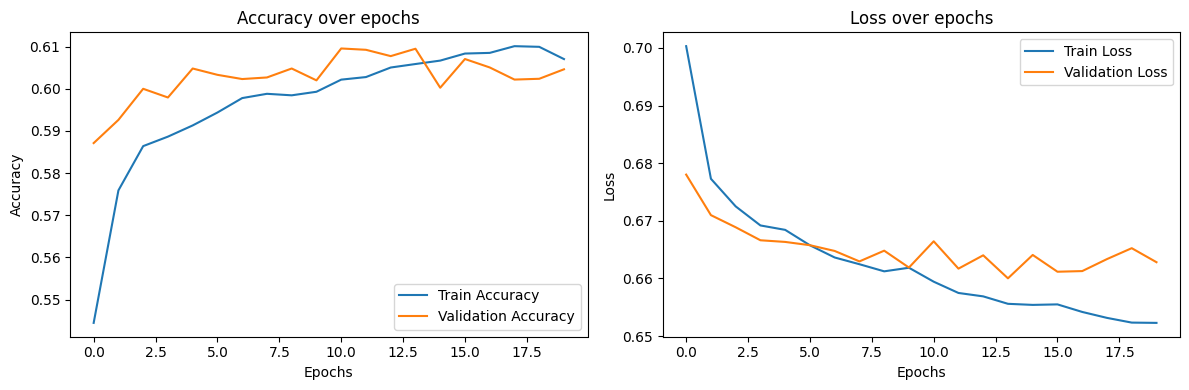

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
